#Unpacking and encoding dataframe#

In [ ]:
import pandas as pd

# Reading data from csv
df = pd.read_csv("ecoli.data", sep="\s+", names=["Sequence name",  "mcg", "gvh", "lip", "chg", "aac", "alm1",
                                       "alm2", "class"])

In [ ]:
df

,Sequence name,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [ ]:
pip install umap-learn

In [ ]:
pip install umap

In [ ]:
from itertools import count
import seaborn as sns
import umap.umap_ as umap
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

df_one_hot = pd.get_dummies(df, columns=["Sequence name"])

le = LabelEncoder()
df_one_hot["class"] = le.fit_transform(df["class"])

df_one_hot

,mcg,gvh,lip,chg,aac,alm1,alm2,class,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,...,Sequence name_USHA_ECOLI,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,7,0,0,...,0,0,0,0,0,0,0,0,0,0
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,7,0,0,...,0,0,0,0,0,0,0,0,0,0
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,7,0,0,...,1,0,0,0,0,0,0,0,0,0
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,7,0,0,...,0,0,0,0,0,0,0,1,0,0


#Functions section#

T-SNE function

In [ ]:
def t_sne_draw(encoded_dataframe, n_components, perplexity, angle):
  X_embedded = TSNE(n_components=n_components, perplexity=perplexity, angle=angle).fit_transform(encoded_dataframe)
  X, Y = X_embedded[:, 0], X_embedded[:, 1]
  sns.scatterplot(x=X, y=Y, hue=encoded_dataframe["class"], palette="deep")

UMAP function

In [ ]:
def umap_draw(encoded_dataframe, n_components, n_neighbors, min_dist):
  reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, metric='euclidean')
  embedding = reducer.fit_transform(encoded_dataframe)
  X_umap, Y_umap = embedding[:, 0], embedding[:, 1]
  sns.scatterplot(x=X_umap, y=Y_umap, hue=encoded_dataframe["class"], palette="deep")

#SVM classifier with RBF kernel#

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, multilabel_confusion_matrix

In [ ]:
# Splitting on test and train
X_train, X_test, y_train, y_test = train_test_split(df_one_hot.loc[:, df_one_hot.columns != "class"], df_one_hot["class"],
                                                    test_size=0.3, shuffle=True)

X_for_test = X_test
X_test_neigh = X_test
X_test_rf = X_test
y_test_neigh = y_test
y_test_rf = y_test

In [ ]:
# Creating and training classifier with RBF kernel
clf = svm.SVC(C=5,kernel="rbf")
clf.fit(X_train, y_train)

SVC(C=5)

In [ ]:
# Printing support vectors
len(clf.support_vectors_)

219

In [ ]:
# Predicting values
pred = clf.predict(X_test)

In [ ]:
# Precision
clf.score(X_test, y_test, sample_weight=None)

0.8811881188118812

In [ ]:
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
print(f1_score(pred, y_test, average="micro"))
print(precision_score(pred, y_test, average="micro"))
print(recall_score(pred, y_test, average="micro"))

0.8811881188118812
0.8811881188118812
0.8811881188118812


In [ ]:
# Check on confusion matrix
multilabel_confusion_matrix(y_test, pred)

array([[[ 52,   3],
        [  0,  46]],

       [[ 72,   3],
        [  4,  22]],

       [[100,   0],
        [  1,   0]],

       [[ 95,   0],
        [  2,   4]],

       [[ 95,   0],
        [  3,   3]],

       [[100,   0],
        [  1,   0]],

       [[ 80,   6],
        [  1,  14]]])

#SVM classifier with linear kernel#

In [ ]:
# Creating and training classifier with linear kernel
clf = svm.SVC(C=5, kernel="linear")
clf.fit(X_train, y_train)

SVC(C=5, kernel='linear')

In [ ]:
# Printing support vectors
len(clf.support_vectors_)

209

In [ ]:
# Predicting values
pred = clf.predict(X_test)

In [ ]:
# Precision
clf.score(X_test, y_test, sample_weight=None)

0.8811881188118812

In [ ]:
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
print(f1_score(pred, y_test, average="micro"))
print(precision_score(pred, y_test, average="micro"))
print(recall_score(pred, y_test, average="micro"))

0.8811881188118812
0.8811881188118812
0.8811881188118812


#SVM classifier with polynomial kernel#

In [ ]:
# Creating and training classifier with linear kernel
clf = svm.SVC(C=5, kernel="poly")
clf.fit(X_train, y_train)

SVC(C=5, kernel='poly')

In [ ]:
# Printing support vectors
len(clf.support_vectors_)

210

In [ ]:
# Predicting values
pred = clf.predict(X_test)

In [ ]:
# Precision
clf.score(X_test, y_test, sample_weight=None)

0.8415841584158416

In [ ]:
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
print(f1_score(pred, y_test, average="micro"))
print(precision_score(pred, y_test, average="micro"))
print(recall_score(pred, y_test, average="micro"))

0.8415841584158416
0.8415841584158416
0.8415841584158416


#SVM classifier with sigmoid kernel#

In [ ]:
# Creating and training classifier with linear kernel
clf = svm.SVC(C=5, kernel="sigmoid")
clf.fit(X_train, y_train)

SVC(C=5, kernel='sigmoid')

In [ ]:
# Printing support vectors
len(clf.support_vectors_)

209

In [ ]:
# Predicting values
pred = clf.predict(X_test)

In [ ]:
# Precision
clf.score(X_test, y_test, sample_weight=None)

0.8514851485148515

In [ ]:
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
print(f1_score(pred, y_test, average="micro"))
print(precision_score(pred, y_test, average="micro"))
print(recall_score(pred, y_test, average="micro"))

0.8514851485148515
0.8514851485148515
0.8514851485148515


#Grid search for SVM classifier#

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {"kernel":("linear", "rbf", "sigmoid", "poly"), "C":list(range(1, 11)), "class_weight": [None, "balanced"]}
scoring = ['accuracy','f1_macro', 'recall']
svc = svm.SVC()

In [ ]:
clf = GridSearchCV(svc, parameters, n_jobs=4, verbose=3, refit=False, cv=2)

In [ ]:
clf.fit(X_train, y_train)

Fitting 2 folds for each of 80 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=2, estimator=SVC(), n_jobs=4,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'class_weight': [None, 'balanced'],
                         'kernel': ('linear', 'rbf', 'sigmoid', 'poly')},
             refit=False, verbose=3)

In [ ]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_class_weight',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
clf.best_params_

{'C': 5, 'class_weight': 'balanced', 'kernel': 'sigmoid'}

#Training using best parameters for SVM classifier according to Grid search and plotting using T-SNE and UMAP#

In [ ]:
# Creating and training classifier with linear kernel
clf = svm.SVC(**clf.best_params_)
clf.fit(X_train, y_train)

SVC(C=5, class_weight='balanced', kernel='sigmoid')

In [ ]:
# Printing support vectors
len(clf.support_vectors_)

215

In [ ]:
# Predicting values
pred = clf.predict(X_test)

In [ ]:
pred_test = pd.Series(pred, name="class")

In [ ]:
# Precision
clf.score(X_test, y_test, sample_weight=None)

0.8514851485148515

In [ ]:
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
print(f1_score(pred, y_test, average="micro"))
print(precision_score(pred, y_test, average="micro"))
print(recall_score(pred, y_test, average="micro"))

0.8514851485148515
0.8514851485148515
0.8514851485148515


In [ ]:
X_test.reset_index(drop=True, inplace=True)
y_pred = pd.DataFrame(pred_test)
new_df = pd.concat([X_test, y_pred], axis=1)
# new_df.drop('index', axis=1, inplace=True)

In [ ]:
new_df

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.70,0.61,0.48,0.5,0.56,0.52,0.43,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0.34,0.67,0.48,0.5,0.52,0.76,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.66,0.49,1.00,0.5,0.54,0.56,0.36,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0.33,0.37,0.48,0.5,0.46,0.65,0.69,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.33,0.45,0.48,0.5,0.52,0.32,0.41,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.42,0.35,0.48,0.5,0.58,0.15,0.27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0.73,0.78,0.48,0.5,0.58,0.51,0.31,0,0,0,...,0,0,0,0,0,0,0,0,0,7
98,0.57,0.59,0.48,0.5,0.39,0.47,0.33,0,0,0,...,0,0,0,0,0,0,0,0,0,7
99,0.87,0.49,0.48,0.5,0.61,0.76,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [ ]:
y_for_test = pd.DataFrame(y_test)
y_for_test.reset_index(drop=True, inplace=True)
y_for_test

,class
0,7
1,1
2,6
3,1
4,0
...,...
96,0
97,7
98,7
99,4


In [ ]:
X_for_test

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USHA_ECOLI,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI
0,0.70,0.61,0.48,0.5,0.56,0.52,0.43,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.34,0.67,0.48,0.5,0.52,0.76,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.66,0.49,1.00,0.5,0.54,0.56,0.36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.33,0.37,0.48,0.5,0.46,0.65,0.69,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.33,0.45,0.48,0.5,0.52,0.32,0.41,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.42,0.35,0.48,0.5,0.58,0.15,0.27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0.73,0.78,0.48,0.5,0.58,0.51,0.31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0.57,0.59,0.48,0.5,0.39,0.47,0.33,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0.87,0.49,0.48,0.5,0.61,0.76,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_df_test = pd.concat([X_for_test, y_for_test], axis=1)
new_df_test

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.70,0.61,0.48,0.5,0.56,0.52,0.43,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0.34,0.67,0.48,0.5,0.52,0.76,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.66,0.49,1.00,0.5,0.54,0.56,0.36,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0.33,0.37,0.48,0.5,0.46,0.65,0.69,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.33,0.45,0.48,0.5,0.52,0.32,0.41,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.42,0.35,0.48,0.5,0.58,0.15,0.27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0.73,0.78,0.48,0.5,0.58,0.51,0.31,0,0,0,...,0,0,0,0,0,0,0,0,0,7
98,0.57,0.59,0.48,0.5,0.39,0.47,0.33,0,0,0,...,0,0,0,0,0,0,0,0,0,7
99,0.87,0.49,0.48,0.5,0.61,0.76,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4


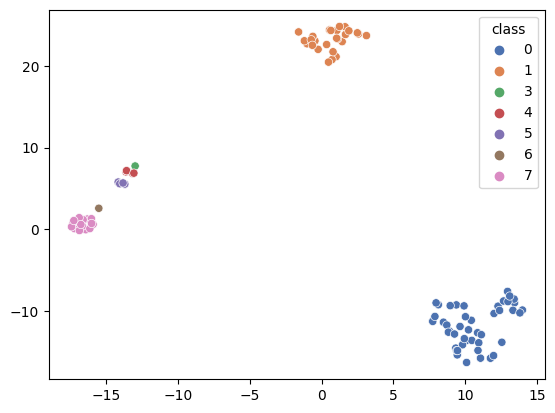

In [ ]:
# T-SNE test plot
t_sne_draw(new_df_test, 2, 15, 0.6)

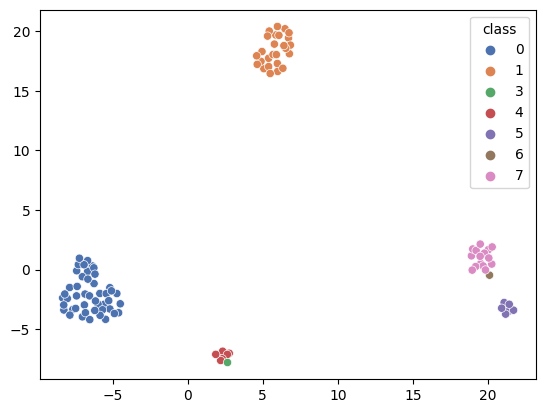

In [ ]:
# UMAP test plot
umap_draw(new_df_test, 2, 15, 0.6)

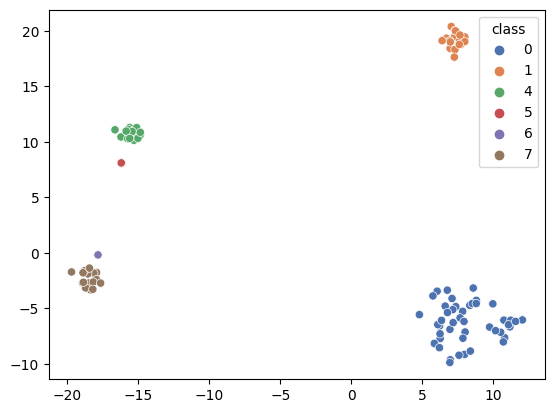

In [ ]:
# T-SNE prediction plot
t_sne_draw(new_df, 2, 15, 0.6)

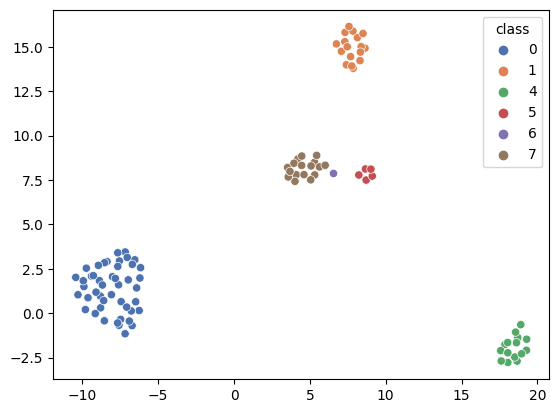

In [ ]:
# UMAP prediction plot
umap_draw(new_df, 2, 15, 0.6)

#KNN classifier with Minkowski metric and different algorithms#

Ball tree algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Training model
neigh = KNeighborsClassifier(n_neighbors=20, algorithm="ball_tree", metric="minkowski")
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=20)

In [ ]:
# Predicting values
pred_neigh = neigh.predict(X_test_neigh)
# Precision
neigh.score(X_test_neigh, y_test_neigh, sample_weight=None)

0.8613861386138614

In [ ]:
# Accuracy
print(f1_score(pred_neigh, y_test_neigh, average="micro"))
print(precision_score(pred_neigh, y_test_neigh, average="micro"))
print(recall_score(pred_neigh, y_test_neigh, average="micro"))

0.8613861386138614
0.8613861386138614
0.8613861386138614


KD tree algorithm

In [ ]:
# Training model
neigh = KNeighborsClassifier(n_neighbors=20, algorithm="kd_tree", metric="minkowski")
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=20)

In [ ]:
# Predicting values
pred_neigh = neigh.predict(X_test_neigh)
# Precision
neigh.score(X_test_neigh, y_test_neigh, sample_weight=None)

0.8613861386138614

In [ ]:
# Accuracy
print(f1_score(pred_neigh, y_test_neigh, average="micro"))
print(precision_score(pred_neigh, y_test_neigh, average="micro"))
print(recall_score(pred_neigh, y_test_neigh, average="micro"))

0.8613861386138614
0.8613861386138614
0.8613861386138614


Brute algorithm

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=20, algorithm="brute", metric="minkowski")
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=20)

In [ ]:
# Predicting values
pred_neigh = neigh.predict(X_test_neigh)
# Precision
neigh.score(X_test_neigh, y_test_neigh, sample_weight=None)

0.8613861386138614

In [ ]:
# Accuracy
print(f1_score(pred_neigh, y_test_neigh, average="micro"))
print(precision_score(pred_neigh, y_test_neigh, average="micro"))
print(recall_score(pred_neigh, y_test_neigh, average="micro"))

0.8613861386138614
0.8613861386138614
0.8613861386138614


#KNN classifier with Manhattan metric and different algorithms#

Ball tree algorithm

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=20, algorithm="ball_tree", metric="manhattan")
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=20)

In [ ]:
# Predicting values
pred_neigh = neigh.predict(X_test_neigh)
# Precision
neigh.score(X_test_neigh, y_test_neigh, sample_weight=None)

0.8514851485148515

In [ ]:
# Accuracy
print(f1_score(pred_neigh, y_test_neigh, average="micro"))
print(precision_score(pred_neigh, y_test_neigh, average="micro"))
print(recall_score(pred_neigh, y_test_neigh, average="micro"))

0.8514851485148515
0.8514851485148515
0.8514851485148515


KD tree algorithm

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=20, algorithm="kd_tree", metric="manhattan")
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', metric='manhattan', n_neighbors=20)

In [ ]:
# Predicting values
pred_neigh = neigh.predict(X_test_neigh)
# Precision
neigh.score(X_test_neigh, y_test_neigh, sample_weight=None)

0.8514851485148515

In [ ]:
# Accuracy
print(f1_score(pred_neigh, y_test_neigh, average="micro"))
print(precision_score(pred_neigh, y_test_neigh, average="micro"))
print(recall_score(pred_neigh, y_test_neigh, average="micro"))

0.8514851485148515
0.8514851485148515
0.8514851485148515


Brute algorithm

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=20, algorithm="kd_tree", metric="manhattan")
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', metric='manhattan', n_neighbors=20)

In [ ]:
# Predicting values
pred_neigh = neigh.predict(X_test_neigh)
# Precision
neigh.score(X_test_neigh, y_test_neigh, sample_weight=None)

0.8514851485148515

In [ ]:
# Accuracy
print(f1_score(pred_neigh, y_test_neigh, average="micro"))
print(precision_score(pred_neigh, y_test_neigh, average="micro"))
print(recall_score(pred_neigh, y_test_neigh, average="micro"))

0.8514851485148515
0.8514851485148515
0.8514851485148515


#KNN classifier with Euclidean metric and different algorithms#

Ball tree algorithm

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=20, algorithm="ball_tree", metric="euclidean")
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=20)

In [ ]:
# Predicting values
pred_neigh = neigh.predict(X_test_neigh)
# Precision
neigh.score(X_test_neigh, y_test_neigh, sample_weight=None)

0.8613861386138614

In [ ]:
# Accuracy
print(f1_score(pred_neigh, y_test_neigh, average="micro"))
print(precision_score(pred_neigh, y_test_neigh, average="micro"))
print(recall_score(pred_neigh, y_test_neigh, average="micro"))

0.8613861386138614
0.8613861386138614
0.8613861386138614


KD tree algorithm

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=20, algorithm="kd_tree", metric="euclidean")
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', metric='euclidean', n_neighbors=20)

In [ ]:
# Predicting values
pred_neigh = neigh.predict(X_test_neigh)
# Precision
neigh.score(X_test_neigh, y_test_neigh, sample_weight=None)

0.8613861386138614

In [ ]:
# Accuracy
print(f1_score(pred_neigh, y_test_neigh, average="micro"))
print(precision_score(pred_neigh, y_test_neigh, average="micro"))
print(recall_score(pred_neigh, y_test_neigh, average="micro"))

0.8613861386138614
0.8613861386138614
0.8613861386138614


Brute algorithm

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=20, algorithm="brute", metric="euclidean")
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=20)

In [ ]:
# Predicting values
pred_neigh = neigh.predict(X_test_neigh)
# Precision
neigh.score(X_test_neigh, y_test_neigh, sample_weight=None)

0.8613861386138614

In [ ]:
# Accuracy
print(f1_score(pred_neigh, y_test_neigh, average="micro"))
print(precision_score(pred_neigh, y_test_neigh, average="micro"))
print(recall_score(pred_neigh, y_test_neigh, average="micro"))

0.8613861386138614
0.8613861386138614
0.8613861386138614


#Grid search for KNN classifier#

In [ ]:
parameters = {"n_neighbors":list(range(5, 30)), "algorithm":("brute", "kd_tree", "ball_tree"),
              "metric":["minkowski", "manhattan", "euclidean"]}

kneigh = KNeighborsClassifier()

In [ ]:
neigh = GridSearchCV(kneigh, parameters, n_jobs=4, verbose=3, refit=False, cv=2)

In [ ]:
neigh.fit(X_train, y_train)

Fitting 2 folds for each of 225 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'algorithm': ('brute', 'kd_tree', 'ball_tree'),
                         'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28, 29]},
             refit=False, verbose=3)

In [ ]:
sorted(neigh.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_algorithm',
 'param_metric',
 'param_n_neighbors',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
neigh.best_params_

{'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 9}

#Training using best parameters for KNN classifier according to Grid search  and plotting using T-SNE and UMAP#


In [ ]:
neigh = KNeighborsClassifier(**neigh.best_params_)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=9)

In [ ]:
# Predicting values
pred_neigh = clf.predict(X_test_neigh)
# Precision
neigh.score(X_test_neigh, y_test_neigh, sample_weight=None)

0.8811881188118812

In [ ]:
print(f1_score(pred_neigh, y_test_neigh, average="micro"))
print(precision_score(pred_neigh, y_test_neigh, average="micro"))
print(recall_score(pred_neigh, y_test_neigh, average="micro"))

0.8514851485148515
0.8514851485148515
0.8514851485148515


In [ ]:
X_test_neigh.reset_index(drop=True, inplace=True)
y_pred = pd.DataFrame(pred_neigh)
y_pred.columns = ["class"]
new_df_neigh = pd.concat([X_test_neigh, y_pred], axis=1)

In [ ]:
y_pred

,class
0,7
1,1
2,6
3,1
4,0
...,...
96,0
97,7
98,7
99,4


In [ ]:
new_df_neigh

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.70,0.61,0.48,0.5,0.56,0.52,0.43,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0.34,0.67,0.48,0.5,0.52,0.76,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.66,0.49,1.00,0.5,0.54,0.56,0.36,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0.33,0.37,0.48,0.5,0.46,0.65,0.69,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.33,0.45,0.48,0.5,0.52,0.32,0.41,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.42,0.35,0.48,0.5,0.58,0.15,0.27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0.73,0.78,0.48,0.5,0.58,0.51,0.31,0,0,0,...,0,0,0,0,0,0,0,0,0,7
98,0.57,0.59,0.48,0.5,0.39,0.47,0.33,0,0,0,...,0,0,0,0,0,0,0,0,0,7
99,0.87,0.49,0.48,0.5,0.61,0.76,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4


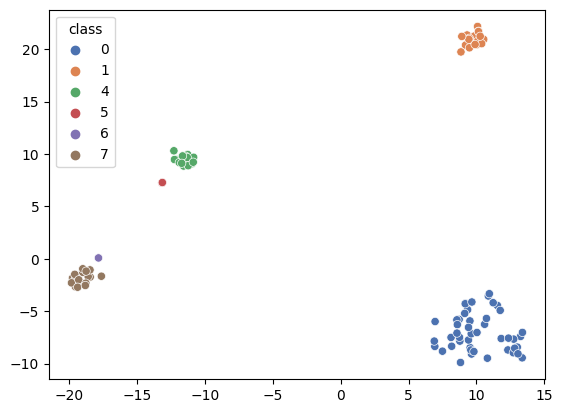

In [ ]:
# T-SNE prediction plot
t_sne_draw(new_df_neigh, 2, 15, 0.6)

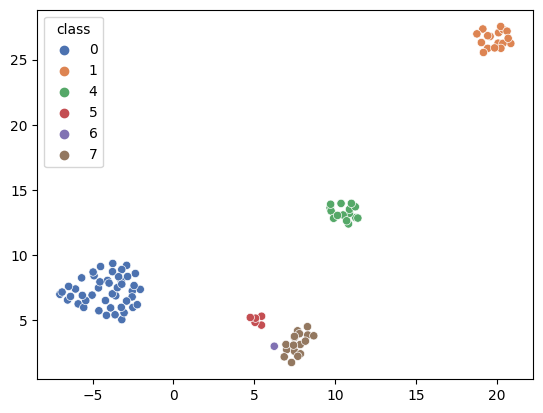

In [ ]:
# UMAP prediction plot
umap_draw(new_df_neigh, 2, 15, 0.6)

#RF classifier with Gini impurity criterion#

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, criterion="gini")
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
# Predicting values
pred_rfc = rfc.predict(X_test_rf)
# Precision
rfc.score(X_test_rf, y_test_rf, sample_weight=None)

0.9108910891089109

In [ ]:
print(f1_score(pred_rfc, y_test_rf, average="micro"))
print(precision_score(pred_rfc, y_test_rf, average="micro"))
print(recall_score(pred_rfc, y_test_rf, average="micro"))

0.9108910891089109
0.9108910891089109
0.9108910891089109


#RF classifier with Entropy criterion#

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, criterion="entropy")
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [ ]:
# Predicting values
pred_rfc = rfc.predict(X_test_rf)
# Precision
rfc.score(X_test_rf, y_test_rf, sample_weight=None)

0.9207920792079208

In [ ]:
print(f1_score(pred_rfc, y_test_rf, average="micro"))
print(precision_score(pred_rfc, y_test_rf, average="micro"))
print(recall_score(pred_rfc, y_test_rf, average="micro"))

0.9207920792079208
0.9207920792079208
0.9207920792079208


#RF classifier with Log loss criterion#

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, criterion="log_loss")
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=200)

In [ ]:
# Predicting values
pred_rfc = rfc.predict(X_test_rf)
# Precision
rfc.score(X_test_rf, y_test_rf, sample_weight=None)

0.9207920792079208

In [ ]:
print(f1_score(pred_rfc, y_test_rf, average="micro"))
print(precision_score(pred_rfc, y_test_rf, average="micro"))
print(recall_score(pred_rfc, y_test_rf, average="micro"))

0.9207920792079208
0.9207920792079208
0.9207920792079208


#Grid search for RF classifier#

In [ ]:
parameters = {"n_estimators":list(range(100, 200, 25)), "criterion":("gini", "entropy", "log_loss"), "max_depth":list(range(3, 6))}
rf = RandomForestClassifier()

In [ ]:
rfc = GridSearchCV(rf, parameters, n_jobs=4, verbose=3, refit=False, cv=2)

In [ ]:
rfc.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 125, 150, 175]},
             refit=False, verbose=3)

In [ ]:
sorted(rfc.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
rfc.best_params_

{'criterion': 'log_loss', 'max_depth': 5, 'n_estimators': 125}

#Training using best parameters for RF classifier according to Grid search  and plotting using T-SNE and UMAP#

In [ ]:
rfc = RandomForestClassifier(**rfc.best_params_)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=125)

In [ ]:
# Predicting values
pred_rf = clf.predict(X_test_rf)
# Precision
neigh.score(X_test_rf, y_test_rf, sample_weight=None)

0.8811881188118812

In [ ]:
print(f1_score(pred_rf, y_test_rf, average="micro"))
print(precision_score(pred_rf, y_test_rf, average="micro"))
print(recall_score(pred_rf, y_test_rf, average="micro"))

0.8514851485148515
0.8514851485148515
0.8514851485148515


In [ ]:
X_test_rf.reset_index(drop=True, inplace=True)
y_pred = pd.DataFrame(pred_rf)
y_pred.columns = ["class"]
new_df_rf = pd.concat([X_test_rf, y_pred], axis=1)
# new_df.drop('index', axis=1, inplace=True)

In [ ]:
new_df_rf

,mcg,gvh,lip,chg,aac,alm1,alm2,Sequence name_AAS_ECOLI,Sequence name_AAT_ECOLI,Sequence name_ACEA_ECOLI,...,Sequence name_USPA_ECOLI,Sequence name_UVRB_ECOLI,Sequence name_UVRC_ECOLI,Sequence name_XGPT_ECOLI,Sequence name_XYLA_ECOLI,Sequence name_XYLE_ECOLI,Sequence name_XYLF_ECOLI,Sequence name_YCEE_ECOLI,Sequence name_YTFQ_ECOLI,class
0,0.70,0.61,0.48,0.5,0.56,0.52,0.43,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0.34,0.67,0.48,0.5,0.52,0.76,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.66,0.49,1.00,0.5,0.54,0.56,0.36,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0.33,0.37,0.48,0.5,0.46,0.65,0.69,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.33,0.45,0.48,0.5,0.52,0.32,0.41,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.42,0.35,0.48,0.5,0.58,0.15,0.27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0.73,0.78,0.48,0.5,0.58,0.51,0.31,0,0,0,...,0,0,0,0,0,0,0,0,0,7
98,0.57,0.59,0.48,0.5,0.39,0.47,0.33,0,0,0,...,0,0,0,0,0,0,0,0,0,7
99,0.87,0.49,0.48,0.5,0.61,0.76,0.79,0,0,0,...,0,0,0,0,0,0,0,0,0,4


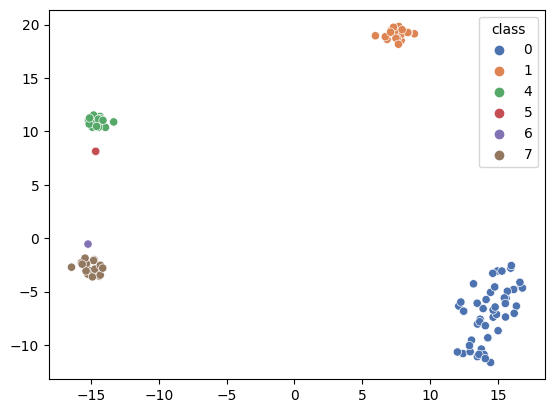

In [ ]:
# T-SNE prediction plot
t_sne_draw(new_df_rf, 2, 15, 0.6)

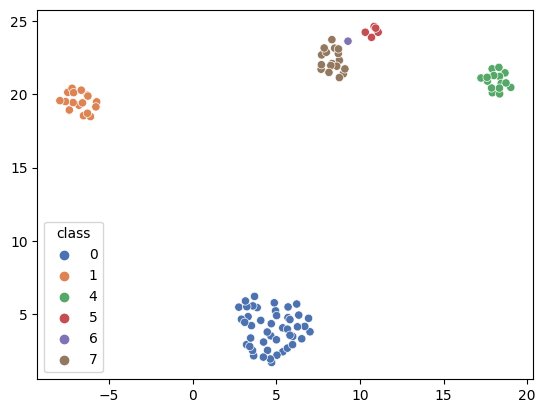

In [ ]:
# UMAP prediction plot
umap_draw(new_df_rf, 2, 15, 0.6)